In [56]:
import pandas as pd

# Adjust the delimiter based on your file's structure
df = pd.read_csv('board_game_price.csv', delimiter=',')

# Display the first few rows
print(df.head())

                                Name  Min Players  Max Players  Play Time  \
0                         Gloomhaven            1            4        120   
1          Pandemic Legacy: Season 1            2            4         60   
2                  Brass: Birmingham            2            4        120   
3                  Terraforming Mars            1            5        120   
4  Twilight Imperium: Fourth Edition            3            6        480   

   Min Age  Users Rated  Rating Average  Complexity Average  Owned Users  \
0       14        42055            8.79                3.86      68323.0   
1       13        41643            8.61                2.84      65294.0   
2       14        19217            8.66                3.91      28785.0   
3       12        64864            8.43                3.24      87099.0   
4       14        13468            8.70                4.22      16831.0   

          Domain1  above_average Bayesian Average Most Notable Genre  \
0  Strat

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   20343 non-null  object 
 1   Min Players            20343 non-null  int64  
 2   Max Players            20343 non-null  int64  
 3   Play Time              20343 non-null  int64  
 4   Min Age                20343 non-null  int64  
 5   Users Rated            20343 non-null  int64  
 6   Rating Average         20343 non-null  float64
 7   Complexity Average     20343 non-null  float64
 8   Owned Users            20320 non-null  float64
 9   Domain1                10184 non-null  object 
 10  above_average          20343 non-null  bool   
 11  Bayesian Average       20127 non-null  object 
 12  Most Notable Genre     20127 non-null  object 
 13  Most Notable Mechanic  20127 non-null  object 
 14  Price                  20127 non-null  object 
dtypes:

In [58]:
df = df.drop(columns=['Domain1', 'Rating Average'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   20343 non-null  object 
 1   Min Players            20343 non-null  int64  
 2   Max Players            20343 non-null  int64  
 3   Play Time              20343 non-null  int64  
 4   Min Age                20343 non-null  int64  
 5   Users Rated            20343 non-null  int64  
 6   Complexity Average     20343 non-null  float64
 7   Owned Users            20320 non-null  float64
 8   above_average          20343 non-null  bool   
 9   Bayesian Average       20127 non-null  object 
 10  Most Notable Genre     20127 non-null  object 
 11  Most Notable Mechanic  20127 non-null  object 
 12  Price                  20127 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 1.9+ MB


In [59]:
# Replace NaN values with 0 in the 'Bayesian Average' column
df['Bayesian Average'].fillna(0, inplace=True)

# Verify the replacement by checking if there are any remaining NaNs
null_count_after = df['Bayesian Average'].isna().sum()

print(f'Number of null values after replacement: {null_count_after}')


Number of null values after replacement: 0


In [60]:
df['Bayesian Average'] = round(df['Bayesian Average'], 2)

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# Calculate the range (min and max)
min_value = df['Bayesian Average'][df['Bayesian Average'] > 0].min()
max_value = df['Bayesian Average'].max()
value_range = max_value - min_value

# Calculate the median
median_value = df['Bayesian Average'].median()

# Display the results
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {value_range}")
print(f"Median Value: {median_value}")

Minimum Value: 3.65
Maximum Value: 8.41
Range: 4.76
Median Value: 5.54


In [ ]:
df['above_average'] = df['Bayesian Average'] > 5.54
df.head()

,Name,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,above_average,Bayesian Average,Most Notable Genre,Most Notable Mechanic,Price
0,Gloomhaven,1,4,120,14,42055,3.86,68323.0,True,8.35,Adventure,Action Queue,99
1,Pandemic Legacy: Season 1,2,4,60,13,41643,2.84,65294.0,True,8.38,Environmental,Action Points,49.5
2,Brass: Birmingham,2,4,120,14,19217,3.91,28785.0,True,8.41,Age of Reason,Hand Management,105
3,Terraforming Mars,1,5,120,12,64864,3.24,87099.0,True,8.21,Economic,Closed Drafting,69.9
4,Twilight Imperium: Fourth Edition,3,6,480,14,13468,4.22,16831.0,True,8.24,Civilization,Action Drafting,127.99


In [ ]:
# Calculate the percentage of users rated and round to 2 decimal places
df['pct_rated'] = round(df['Users Rated'] / df['Owned Users'], 2)

df['pct_rated'].replace([float('inf'), float('-inf')], 0, inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

                                Name  Min Players  Max Players  Play Time  \
0                         Gloomhaven            1            4        120   
1          Pandemic Legacy: Season 1            2            4         60   
2                  Brass: Birmingham            2            4        120   
3                  Terraforming Mars            1            5        120   
4  Twilight Imperium: Fourth Edition            3            6        480   

   Min Age  Users Rated  Complexity Average  Owned Users  above_average  \
0       14        42055                3.86      68323.0           True   
1       13        41643                2.84      65294.0           True   
2       14        19217                3.91      28785.0           True   
3       12        64864                3.24      87099.0           True   
4       14        13468                4.22      16831.0           True   

   Bayesian Average Most Notable Genre Most Notable Mechanic   Price  \
0             

In [ ]:
df = df.drop(columns=['Bayesian Average', 'Name'])
df.head()

,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,above_average,Most Notable Genre,Most Notable Mechanic,Price,pct_rated
0,1,4,120,14,42055,3.86,68323.0,True,Adventure,Action Queue,99,0.62
1,2,4,60,13,41643,2.84,65294.0,True,Environmental,Action Points,49.5,0.64
2,2,4,120,14,19217,3.91,28785.0,True,Age of Reason,Hand Management,105,0.67
3,1,5,120,12,64864,3.24,87099.0,True,Economic,Closed Drafting,69.9,0.74
4,3,6,480,14,13468,4.22,16831.0,True,Civilization,Action Drafting,127.99,0.80


In [ ]:
# Replace NaN values with 'unspecified' in both columns
df['Most Notable Genre'].fillna('unspecified', inplace=True)
df['Most Notable Mechanic'].fillna('unspecified', inplace=True)


In [ ]:
# Replace NaN values with 0 in the 'Price' column
df['Price'].fillna(0, inplace=True)


In [ ]:
# Calculate the mean of the non-zero 'Price' values
non_zero_mean = df[df['Price'] > 0]['Price'].mean()

# Print the calculated mean
print(f'The mean of non-zero prices is: {non_zero_mean}')


The mean of non-zero prices is: 28.816026493831373


In [ ]:
# Replace 0s in the 'Price' column with the calculated mean
df.loc[df['Price'] == 0, 'Price'] = non_zero_mean


In [ ]:
# Replace NaN values with 0 in the 'Price' column
df['Owned Users'].fillna(0, inplace=True)

In [ ]:
# Calculate the mean of the non-zero 'Price' values
non_zero_mean = df[df['Owned Users'] > 0]['Owned Users'].mean()

# Print the calculated mean
print(f'The mean of non-zero prices is: {non_zero_mean}')

The mean of non-zero prices is: 1408.526945223682


In [ ]:
# Replace 0s in the 'Price' column with the calculated mean
df.loc[df['Owned Users'] == 0, 'Owned Users'] = non_zero_mean

In [ ]:
# Calculate the percentage of users rated and round to 2 decimal places
df['pct_rated'] = round(df['Users Rated'] / df['Owned Users'], 2)

df['pct_rated'].replace([float('inf'), float('-inf')], 0, inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

   Min Players  Max Players  Play Time  Min Age  Users Rated  \
0            1            4        120       14        42055   
1            2            4         60       13        41643   
2            2            4        120       14        19217   
3            1            5        120       12        64864   
4            3            6        480       14        13468   

   Complexity Average  Owned Users  above_average Most Notable Genre  \
0                3.86      68323.0           True          Adventure   
1                2.84      65294.0           True      Environmental   
2                3.91      28785.0           True      Age of Reason   
3                3.24      87099.0           True           Economic   
4                4.22      16831.0           True       Civilization   

  Most Notable Mechanic   Price  pct_rated  
0          Action Queue   99.00       0.62  
1         Action Points   49.50       0.64  
2       Hand Management  105.00       0.67  
3 

In [ ]:
# Count the number of null values in the entire DataFrame
null_counts = df.isna().sum()

# Print the count of nulls in each column
print(null_counts)



Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Complexity Average       0
Owned Users              0
above_average            0
Most Notable Genre       0
Most Notable Mechanic    0
Price                    0
pct_rated                0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Min Players            20343 non-null  int64  
 1   Max Players            20343 non-null  int64  
 2   Play Time              20343 non-null  int64  
 3   Min Age                20343 non-null  int64  
 4   Users Rated            20343 non-null  int64  
 5   Complexity Average     20343 non-null  float64
 6   Owned Users            20343 non-null  float64
 7   above_average          20343 non-null  bool   
 8   Most Notable Genre     20343 non-null  object 
 9   Most Notable Mechanic  20343 non-null  object 
 10  Price                  20343 non-null  float64
 11  pct_rated              20343 non-null  float64
dtypes: bool(1), float64(4), int64(5), object(2)
memory usage: 1.7+ MB


In [ ]:
df = pd.get_dummies(df, columns=['Most Notable Genre', 'Most Notable Mechanic'])
df.tail()

,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,above_average,Price,pct_rated,...,Most Notable Mechanic_Trading,Most Notable Mechanic_Traitor Game,Most Notable Mechanic_Trick-taking,Most Notable Mechanic_Turn Order: Time Track,Most Notable Mechanic_Variable Phase Order,Most Notable Mechanic_Variable Player Powers,Most Notable Mechanic_Voting,Most Notable Mechanic_Worker Placement,"Most Notable Mechanic_Worker Placement, Different Worker Types",Most Notable Mechanic_unspecified
20338,2,2,30,4,1340,1.00,427.0,False,150.000000,3.14,...,False,False,False,False,False,False,False,False,False,False
20339,2,99,60,5,2154,1.05,1533.0,False,28.816026,1.41,...,False,False,False,False,False,False,False,False,False,False
20340,2,4,30,3,4006,1.08,5788.0,False,5.000000,0.69,...,False,False,False,False,False,False,False,False,False,False
20341,2,6,30,3,3783,1.02,4400.0,False,2.990000,0.86,...,False,False,False,False,False,False,False,False,False,False
20342,2,2,1,4,3275,1.16,1374.0,False,57.000000,2.38,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Columns: 255 entries, Min Players to Most Notable Mechanic_unspecified
dtypes: bool(246), float64(4), int64(5)
memory usage: 6.2 MB


In [ ]:
X = df.copy()
X.drop('above_average', axis=1, inplace=True)
X.head()

,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,Price,pct_rated,Most Notable Genre_Abstract Strategy,...,Most Notable Mechanic_Trading,Most Notable Mechanic_Traitor Game,Most Notable Mechanic_Trick-taking,Most Notable Mechanic_Turn Order: Time Track,Most Notable Mechanic_Variable Phase Order,Most Notable Mechanic_Variable Player Powers,Most Notable Mechanic_Voting,Most Notable Mechanic_Worker Placement,"Most Notable Mechanic_Worker Placement, Different Worker Types",Most Notable Mechanic_unspecified
0,1,4,120,14,42055,3.86,68323.0,99.00,0.62,False,...,False,False,False,False,False,False,False,False,False,False
1,2,4,60,13,41643,2.84,65294.0,49.50,0.64,False,...,False,False,False,False,False,False,False,False,False,False
2,2,4,120,14,19217,3.91,28785.0,105.00,0.67,False,...,False,False,False,False,False,False,False,False,False,False
3,1,5,120,12,64864,3.24,87099.0,69.90,0.74,False,...,False,False,False,False,False,False,False,False,False,False
4,3,6,480,14,13468,4.22,16831.0,127.99,0.80,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = df['above_average']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
predictions = rf_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2317,331
Actual 1,408,2030


Accuracy Score : 0.8546991742036965
Classification Report
              precision    recall  f1-score   support

       False       0.85      0.88      0.86      2648
        True       0.86      0.83      0.85      2438

    accuracy                           0.85      5086
   macro avg       0.86      0.85      0.85      5086
weighted avg       0.85      0.85      0.85      5086



In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.22126117125369668, 'Users Rated'),
 (0.2018343688516811, 'Owned Users'),
 (0.09209155195844437, 'Price'),
 (0.07836995513579913, 'Complexity Average'),
 (0.06344303719165666, 'pct_rated'),
 (0.044116170665224476, 'Play Time'),
 (0.038852061895437925, 'Min Age'),
 (0.03018448858373372, 'Max Players'),
 (0.020343959117910888, 'Min Players'),
 (0.00900700720774365, 'Most Notable Mechanic_unspecified'),
 (0.00894638485064876, 'Most Notable Genre_unspecified'),
 (0.008852007409156929, 'Most Notable Mechanic_Not available'),
 (0.007302418070915355, 'Most Notable Genre_Card Game'),
 (0.006666149300483319, 'Most Notable Mechanic_Dice Rolling'),
 (0.006119429913421063, 'Most Notable Mechanic_Roll / Spin and Move'),
 (0.005386507241739771, 'Most Notable Mechanic_Hand Management'),
 (0.00503147795624817, 'Most Notable Mechanic_Area Majority / Influence'),
 (0.004719800246373132, 'Most Notable Mechanic_Action Points'),
 (0.00435842700936216, 'Most Notable Mechanic_Cooperative Game'),
 (0.00397

<Axes: title={'center': 'Top 10 Feature Importances'}, ylabel='1'>

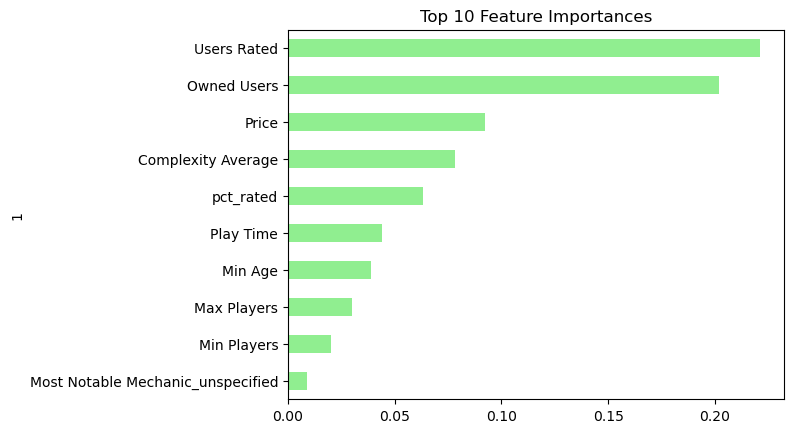

In [61]:
# Visualize the top 10 features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

# Select the top 10 features
top_10_importances = importances_df.head(10)

# Sort and plot the top 10 features
top_10_importances_sorted = top_10_importances.sort_values(by='Feature Importances')
top_10_importances_sorted.plot(kind='barh', color='lightgreen', title='Top 10 Feature Importances', legend=False)
